SAT & ACT Analysis
Problem Statement
The participation percentage and average marks secured by various states in United States at SAT and ACT Examination for year 2017 and 2018 is given. analyse the following,

 - Student's participation in ACT and SAT Examination. 
 - Does the participation rates changes with year? If it changes, why it changes?
 - What are the trends of their scores in subtest and in the composite? 
 - Which are the states that shows interesting trends? Why there is difference in trend?
 - How can improve  particiation percentage at least in 1 of the states with lesser participation in SAT Examination?

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
import csv
import pandas as pd
import matplotlib.colors as colors
%matplotlib inline

2017 Data Import and Cleaning
1. Read In SAT & ACT Data
Read in the sat_2017.csv and act_2017.csv files and assign to appropriately named pandas dataframes.

In [2]:
# Code to read in sat_2017.csv
sat_2017_pd = pd.read_csv('sat_2017.csv')

In [3]:
# Code to read in sat_2017.csv
act_2017_pd = pd.read_csv('act_2017.csv')

2. Display Data
Print the first 10 rows of each dataframe to jupyter notebook

In [4]:
#printing 1st 10 rows sat_2017 data frame
sat_2017_pd.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
#printing 1st 10 rows act_2017 data frame
act_2017_pd.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


3. Verbally Describe Data

ACT_2017 and SAT_2017 data frame is about the results of ACT and SAT examination held in 2017. 
It is given the details of students participating from various states in United States 
and the marks in the examination. 

ACT assesses knowledge of subjects taught in high school.
SAT measures literacy and writing skills, and assesses how well a student analyzes and solves problems.
ACT examination is popular in certain states and 
SAT examination is popular in some other states.

ACT have extra row with national average, 
while SAT do not have national average.

4a. Does the data look complete?
Answer:The data looks complete but it is just average and not individual score.

4b. Are there any obvious issues with the observations?
What is the minimum possible value for each test/subtest? 
What is the maximum possible value?

Consider comparing any questionable values to the sources of data:

SAT
ACT
Answer:

SAT:
Minimum possible mark in SAT Examination for the total is 400 
while for the subtest is 200.
Maximum possible mark in SAT Examination for the total is 1600 
while for the subtest is 800.

ACT:
Minimum possible mark in ACT Examination for the composite is 1 
while for the subtest is 1.
Maximum possible mark in ACT Examination for the composite is 36 
while for the subtest is 1 and maximum possible ACT score is 36.

4c. Fix any errors you identified
The data is available so there is no need to guess or calculate anything. 
If  did not find any errors, continue to the next step.



In [6]:
#code
sat_2017_pd.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [7]:
act_2017_pd.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


From above statistics, can see the marks are within the range 
and it is a complete data. 
While ACT examination have a extra row with national average.

5. What are the data types?
Display the data types of each feature.

In [8]:
#code 
# info function is used to get the data types for the sat_2017 data frame.
sat_2017_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [9]:
# info function is used to get the data types for the sat_2017 data frame.
act_2017_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [ ]:
The data type of SAT_2017 marks are in int and ACT_2017 in float. 
The total and composite in the SAT_2017 and ACT_2017 also in int and object. 
So, The data types and figure has to be the same and comparable. 
But the figures for SAT_2017 in hundreds and thousands and ACT 2017 in tens. 
Also participation rates has to be converted to relevant data type.

6. Fix Incorrect Data Types
Based on what discovered above, 
use appropriate methods to re-type incorrectly typed data.

Define a function that will allow to convert participation rates 
to an appropriate numeric type. 

Use map or apply to change these columns in each dataframe.

In [10]:
#code
#Removing the percentage from the participation column in act_2017_pd 
act_2017_pd['Participation']=act_2017_pd['Participation'].apply(lambda x: x.strip('%'))

In [11]:
#converting participation column into float
act_2017_pd['Participation'] = act_2017_pd['Participation'].astype('float')
act_2017_pd['Composite']=act_2017_pd['Composite'].apply(lambda x: x.strip('x'))
act_2017_pd['Composite'] = pd.to_numeric(act_2017_pd['Composite'])
act_2017_pd.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [12]:
act_2017_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


In [13]:
#code
#Removing the percentage from the participation column in sat_2017_pd 
sat_2017_pd['Participation']=sat_2017_pd['Participation'].apply(lambda x: x.strip('%'))
#converting participation column into float
sat_2017_pd['Participation'] = sat_2017_pd['Participation'].astype('float')
sat_2017_pd.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [14]:
sat_2017_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


Fix any individual values preventing other columns from being the appropriate type.

Finish data modifications by making sure the columns are now typed appropriately.

In [15]:
#code
# conversion of sat_2017 Evidence-Based Reading and Writing, Math and Total into float
# sat_2017_pd['Evidence-Based Reading and Writing'] is assigned to variable 'a' to avoid key error

a=sat_2017_pd['Evidence-Based Reading and Writing']
sat_2017_pd['Evidence-Based Reading and Writing'] = a.astype('float')
sat_2017_pd['Math'] = sat_2017_pd['Math'].astype('float')
sat_2017_pd['Total'] = sat_2017_pd['Total'].astype('float')

In [17]:
#Code:
#Checking the data types of sat_2017_pd datas
sat_2017_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. 
solution should map all column names being changed at once (no repeated singular name-changes). We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way.

Guidelines:

Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
Column names should not contain spaces (underscores will suffice--this allows for using the df.column_name method to access columns in addition to df['column_name'].
Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [18]:
#code
#Renaming the columns of dataframe sat_2017_pd
sat_2017_pd.rename(columns={'State':'states_participating','Participation':'sat_2017_participation',
                          'Evidence-Based Reading and Writing':'sat_2017_evidence_based_reading_writing',
                           'Math':'sat_2017_math','Total':'sat_2017_total'
                           }, inplace=True)
#Renaming the columns of dataframe act_2017_pd
act_2017_pd.rename(columns={'State':'states_participating','Participation':'act_2017_participation',
                          'English':'act_2017_english', 'Math':'act_2017_math',
                           'Reading':'act_2017_reading','Science':'act_2017_science',
                            'Composite':'act_2017_composite'
                           }, inplace=True)

8. Create a data dictionary

9. Drop unnecessary rows
One of dataframes contains an extra row. 
Identify and remove this from the dataframe.

In [19]:
#code
#Removal of additional row of national average under ACT_2017
act_2017_pd = act_2017_pd.drop(act_2017_pd.index[0])
act_2017_pd.head()

,states_participating,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


10. Merge Dataframes
Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key.
Assign this to a new variable.

In [20]:
#Code:
# sat_2017_pd, act_2017_pd is merged into act_sat_2017_pd with states_participating as common column 
act_sat_2017_pd = pd.merge(sat_2017_pd, act_2017_pd, on='states_participating')

In [21]:
act_sat_2017_pd.head(3)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7


11. Save cleaned, merged dataframe
Use a relative path to save out data as combined_2017.csv

In [22]:
#code
#act_sat_2017_pd is saved into project_1/code as csv file 
act_sat_2017_pd.to_csv('combined_2017.csv')

2018 Data Import and Cleaning

In [23]:
# Code to read in sat_2018.csv
sat_2018_pd = pd.read_csv('sat_2018_manual.csv')

# Code to read in act_2018.csv
act_2018_pd = pd.read_csv('act_2018_manual.csv')


#Renaming the columns of dataframe sat_2018_pd
sat_2018_pd.rename(columns={'States':'states_participating','Participation':'sat_2018_participation',
                          'ERW':'sat_2018_evidence_based_reading_writing',
                           'Math':'sat_2018_math','Total':'sat_2018_total'
                           }, inplace=True)

#Renaming the columns of dataframe act_2017_pd
act_2018_pd=act_2018_pd.rename(columns={'State':'states_participating','Participation':'act_2018_participation',
                          'English':'act_2018_english', 'Math':'act_2018_math',
                           'Reading':'act_2018_reading','Science':'act_2018_science',
                            'Composite':'act_2018_composite'
                           })

#removing the 2 extra states in sat_2018_pd with no participation percentage
sat_2018_pd=sat_2018_pd.drop(sat_2018_pd.index[[39,47]])

# Checking the file sat_2018_pd's and act_2018_pd's datatypes
sat_2018_pd.info()
act_2018_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 5 columns):
states_participating                       51 non-null object
sat_2018_participation                     51 non-null float64
sat_2018_evidence_based_reading_writing    51 non-null float64
sat_2018_math                              51 non-null float64
sat_2018_total                             51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
states_participating      51 non-null object
act_2018_participation    51 non-null float64
act_2018_composite        51 non-null float64
act_2018_english          51 non-null float64
act_2018_math             51 non-null float64
act_2018_reading          51 non-null float64
act_2018_science          51 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


Combine 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming formatted all state names identically. 
Make sure none of columns (other than state) have identical names. 
encoding participation rates as floats or integers and standardize this across datasets.

Save the contents of this merged dataframe as final.csv.

Use this combined dataframe for the remainder of the project.

In [24]:
# combining 2017 and 2018 data together
act_sat_2018_pd = pd.merge(sat_2018_pd, act_2018_pd,on='states_participating')
act_sat_2017_2018_pd = pd.merge(act_sat_2017_pd, act_sat_2018_pd,on='states_participating')
act_sat_2017_2018_pd.head()

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,...,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,...,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,...,29.0,577.0,572.0,1149.0,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,...,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,...,60.0,540.0,536.0,1076.0,27.0,22.7,22.5,22.5,23.0,22.1


In [25]:
act_sat_2017_2018_pd.to_csv('final.csv')

Exploratory Data Analysis
Summary Statistics
Transpose the output of pandas describe method to create a quick overview of each numeric feature

In [26]:
#Code:
# Finding the Statistical data for participation and marks from SAT 2017, 2018, ACT 2017, 2018 datas.
act_sat_2017_2018_pd.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_evidence_based_reading_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


In [27]:
#code
#function to calculate standard deviation
def Std_deviation(x,dataframe,n,ddof):
#finding mean '𝜇'    
    y=0
    for i in range (0,n):
        y += dataframe.loc[i,x]
    mean = y/(n)

#finding std_deviation from mean '𝜇'     
    sum = 0
    for i in range (0,n):
        sum += (   (   (   dataframe.loc[i,x]   )-(round(mean,6))      )**2.0   )
    std_deviation = (sum/(n-ddof))**(0.5)
    print(std_deviation)
    return std_deviation

In [28]:
Std_deviation('sat_2017_evidence_based_reading_writing',act_sat_2017_2018_pd,51,1)
#act_sat_2017_2018_pd.columns.values

45.66690138768932


45.66690138768932

In [29]:
#Code:
items =  ['sat_2017_participation',
 'sat_2017_evidence_based_reading_writing', 'sat_2017_math',
 'sat_2017_total', 'act_2017_participation', 'act_2017_english',
 'act_2017_math', 'act_2017_reading', 'act_2017_science',
 'act_2017_composite', 'sat_2018_participation',
 'sat_2018_evidence_based_reading_writing', 'sat_2018_math',
 'sat_2018_total', 'act_2018_participation',
 'act_2018_composite']


print({item:Std_deviation(item,act_sat_2017_2018_pd,51,1) for item in items})

35.276632270013046
45.66690138768932
47.12139516560328
92.49481172519046
32.140842015886825
2.3536771398030742
1.9819894936505549
2.067270626487374
1.739353046281289
2.0206948911543474
37.314256330391956
47.502627378316035
47.77262322095956
94.155082750976
34.08097623567245
2.1062781969952353
{'sat_2017_participation': 35.276632270013046, 'sat_2017_evidence_based_reading_writing': 45.66690138768932, 'sat_2017_math': 47.12139516560328, 'sat_2017_total': 92.49481172519046, 'act_2017_participation': 32.140842015886825, 'act_2017_english': 2.3536771398030742, 'act_2017_math': 1.9819894936505549, 'act_2017_reading': 2.067270626487374, 'act_2017_science': 1.739353046281289, 'act_2017_composite': 2.0206948911543474, 'sat_2018_participation': 37.314256330391956, 'sat_2018_evidence_based_reading_writing': 47.502627378316035, 'sat_2018_math': 47.77262322095956, 'sat_2018_total': 94.155082750976, 'act_2018_participation': 34.08097623567245, 'act_2018_composite': 2.1062781969952353}


In [30]:
#calculating numpy standard deviation
np.std(act_sat_2017_2018_pd,ddof=1)

sat_2017_participation                     35.276632
sat_2017_evidence_based_reading_writing    45.666901
sat_2017_math                              47.121395
sat_2017_total                             92.494812
act_2017_participation                     32.140842
act_2017_english                            2.353677
act_2017_math                               1.981989
act_2017_reading                            2.067271
act_2017_science                            1.739353
act_2017_composite                          2.020695
sat_2018_participation                     37.314256
sat_2018_evidence_based_reading_writing    47.502627
sat_2018_math                              47.772623
sat_2018_total                             94.155083
act_2018_participation                     34.080976
act_2018_composite                          2.106278
act_2018_english                            2.446356
act_2018_math                               2.035765
act_2018_reading                            2.

In [31]:
# To display maximum columns in the dataframe
pd.set_option('display.max_columns', 500)

In [32]:
#code
# lowest participation rates for 2017 SAT found using mask and sort 
msk=((act_sat_2017_2018_pd['sat_2017_participation'])<=10.0)
act_sat_2017_2018_pd[msk].sort_values(by='sat_2017_participation')

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634.0,631.0,1265.0,68.0,21.8,21.0,21.2,22.5,22.0
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640.0,643.0,1283.0,98.0,20.3,19.1,20.3,20.7,20.5
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630.0,606.0,1236.0,100.0,18.6,18.2,18.1,18.9,18.6
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,20.4,4.0,633.0,629.0,1262.0,100.0,20.0,19.5,19.7,20.5,20.0
44,Utah,3.0,624.0,614.0,1238.0,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480.0,530.0,1010.0,100.0,20.4,19.7,19.9,20.9,20.5
41,South Dakota,3.0,612.0,603.0,1216.0,80.0,20.7,21.5,22.3,22.0,21.8,3.0,622.0,618.0,1240.0,77.0,21.9,20.8,21.6,22.4,22.2
27,Nebraska,3.0,629.0,625.0,1253.0,84.0,20.9,20.9,21.9,21.5,21.4,3.0,629.0,623.0,1252.0,100.0,20.1,19.4,19.8,20.4,20.1
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641.0,653.0,1294.0,100.0,20.5,19.8,20.3,20.6,20.8
50,Wyoming,3.0,626.0,604.0,1230.0,100.0,19.4,19.8,20.8,20.6,20.2,3.0,633.0,625.0,1257.0,100.0,20.0,19.0,19.7,20.6,20.3
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4


North dakota, Mississippi, lowa are the states with least participation in 'sat_2017_participation'

In [33]:
# highest participation rates for 2017 SAT found using mask and sort 
msk=((act_sat_2017_2018_pd['sat_2017_participation'])==100.0)
act_sat_2017_2018_pd[msk].sort_values(by='sat_2017_participation')

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535.0,519.0,1053.0,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505.0,492.0,998.0,17.0,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497.0,480.0,977.0,32.0,23.6,23.7,22.7,24.4,23.0
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511.0,499.0,1011.0,22.0,24.4,24.5,23.9,24.7,23.9


Connecticut, Delaware, District of Columbia and Michigan are the states with maximum participation in 'sat_2017_participation'

In [34]:
# lowest participation rates for 2017 ACT found using sorting
act_sat_2017_2018_pd.sort_values(by=['act_2017_participation']).head(3)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512.0,501.0,1013.0,7.0,24.0,23.8,23.6,24.7,23.4
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535.0,528.0,1063.0,16.0,25.1,25.1,24.7,25.6,24.4
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505.0,492.0,998.0,17.0,23.2,23.7,23.1,24.5,23.4


Maine is the states with least participation in 'act_2017_participation'

In [35]:
# highest participation rates for 2017 act
act_sat_2017_2018_pd.sort_values(by=['act_2017_participation']).tail(20)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480.0,530.0,1010.0,89.0,18.9,18.2,19.0,19.1,19.0
13,Illinois,9.0,559.0,556.0,1115.0,93.0,21.0,21.2,21.6,21.3,21.4,99.0,513.0,506.0,1019.0,43.0,23.9,24.1,23.4,24.2,23.4
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640.0,643.0,1283.0,98.0,20.3,19.1,20.3,20.7,20.5
40,South Carolina,50.0,543.0,521.0,1064.0,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547.0,523.0,1070.0,100.0,18.3,17.3,18.2,18.6,18.5
44,Utah,3.0,624.0,614.0,1238.0,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480.0,530.0,1010.0,100.0,20.4,19.7,19.9,20.9,20.5
42,Tennessee,5.0,623.0,604.0,1228.0,100.0,19.5,19.2,20.1,19.9,19.8,6.0,624.0,607.0,1231.0,100.0,19.6,19.4,19.1,19.9,19.6
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,20.4,4.0,633.0,629.0,1262.0,100.0,20.0,19.5,19.7,20.5,20.0
33,North Carolina,49.0,546.0,535.0,1081.0,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554.0,543.0,1098.0,100.0,19.1,18.0,19.3,19.5,19.2
28,Nevada,26.0,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574.0,566.0,1140.0,100.0,17.7,16.6,17.8,18.0,17.9


South Carolina, Utah, Tennessee, Alabama, Missouri, North Carolina, Nevada, Montana, Wisconsin, Mississippi, Minnesota, Louisiana,Kentucky, Colorado, Arkansas, Oklahoma and Wyoming have the maximum participation rate for act_2017_participation

In [36]:
# highest and lowest participation rates for 2018 SAT
msk=((act_sat_2017_2018_pd['sat_2018_participation'])<=10.0)|((act_sat_2017_2018_pd['sat_2018_participation'])==100.0)
act_sat_2017_2018_pd[msk].sort_values(by='sat_2018_participation')

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640.0,643.0,1283.0,98.0,20.3,19.1,20.3,20.7,20.5
50,Wyoming,3.0,626.0,604.0,1230.0,100.0,19.4,19.8,20.8,20.6,20.2,3.0,633.0,625.0,1257.0,100.0,20.0,19.0,19.7,20.6,20.3
41,South Dakota,3.0,612.0,603.0,1216.0,80.0,20.7,21.5,22.3,22.0,21.8,3.0,622.0,618.0,1240.0,77.0,21.9,20.8,21.6,22.4,22.2
27,Nebraska,3.0,629.0,625.0,1253.0,84.0,20.9,20.9,21.9,21.5,21.4,3.0,629.0,623.0,1252.0,100.0,20.1,19.4,19.8,20.4,20.1
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634.0,631.0,1265.0,68.0,21.8,21.0,21.2,22.5,22.0
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630.0,606.0,1236.0,100.0,18.6,18.2,18.1,18.9,18.6
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641.0,653.0,1294.0,100.0,20.5,19.8,20.3,20.6,20.8
44,Utah,3.0,624.0,614.0,1238.0,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480.0,530.0,1010.0,100.0,20.4,19.7,19.9,20.9,20.5
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,20.4,4.0,633.0,629.0,1262.0,100.0,20.0,19.5,19.7,20.5,20.0
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643.0,655.0,1298.0,99.0,21.3,20.2,21.4,21.7,21.4


Colorado, Connecticut, Delaware, Michigan, Idaho has the highest participation rates for 2018 SAT North Dakota has least participation rate for SAT 2018

In [37]:
# lowest participation rates for 2018 ACT
act_sat_2017_2018_pd.sort_values(by=['act_2018_participation']).head(3)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512.0,501.0,1013.0,7.0,24.0,23.8,23.6,24.7,23.4
39,Rhode Island,71.0,539.0,524.0,1062.0,21.0,24.0,23.3,24.7,23.4,24.0,97.0,513.0,505.0,1018.0,15.0,24.2,24.4,23.6,25.0,23.5
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535.0,528.0,1063.0,16.0,25.1,25.1,24.7,25.6,24.4


Maine is the states with least participation in 'act_2018_participation'

In [38]:
# highest participation rates for 2018 act
act_sat_2017_2018_pd.sort_values(by=['act_2018_participation']).tail(20)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480.0,530.0,1010.0,89.0,18.9,18.2,19.0,19.1,19.0
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640.0,643.0,1283.0,98.0,20.3,19.1,20.3,20.7,20.5
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643.0,655.0,1298.0,99.0,21.3,20.2,21.4,21.7,21.4
44,Utah,3.0,624.0,614.0,1238.0,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480.0,530.0,1010.0,100.0,20.4,19.7,19.9,20.9,20.5
42,Tennessee,5.0,623.0,604.0,1228.0,100.0,19.5,19.2,20.1,19.9,19.8,6.0,624.0,607.0,1231.0,100.0,19.6,19.4,19.1,19.9,19.6
40,South Carolina,50.0,543.0,521.0,1064.0,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547.0,523.0,1070.0,100.0,18.3,17.3,18.2,18.6,18.5
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,20.4,4.0,633.0,629.0,1262.0,100.0,20.0,19.5,19.7,20.5,20.0
35,Ohio,12.0,578.0,570.0,1149.0,75.0,21.2,21.6,22.5,22.0,22.0,18.0,552.0,547.0,1099.0,100.0,20.3,19.3,20.3,20.8,20.4
33,North Carolina,49.0,546.0,535.0,1081.0,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554.0,543.0,1098.0,100.0,19.1,18.0,19.3,19.5,19.2


Wyoming,Oklahoma,Arkansas,Kentucky,Louisiana,Mississippi,Wisconsin,Montana,Nevada,Nebraska,North Carolina,Ohio,Missouri, Alabama,Tennessee,Utah,South Carolina has the maximum participation in ACT 2018 Examination.

In [39]:
#lowest mean total/composite scores for the SAT 2017
act_sat_2017_2018_pd.sort_values(by=['sat_2017_total']).head(3)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497.0,480.0,977.0,32.0,23.6,23.7,22.7,24.4,23.0
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505.0,492.0,998.0,17.0,23.2,23.7,23.1,24.5,23.4
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508.0,493.0,1001.0,36.0,22.3,21.9,21.6,23.2,22.1


District of Columbia has least mean total/composite scores for the SAT 2017

In [40]:
#highest mean total/composite scores for the SAT 2017
act_sat_2017_2018_pd.sort_values(by=['sat_2017_total']).tail(3)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634.0,631.0,1265.0,68.0,21.8,21.0,21.2,22.5,22.0
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641.0,653.0,1294.0,100.0,20.5,19.8,20.3,20.6,20.8
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643.0,655.0,1298.0,99.0,21.3,20.2,21.4,21.7,21.4


Minnesota has highest mean total/composite scores for the SAT 2017

In [41]:
#lowest mean total/composite scores for the ACT 2017
act_sat_2017_2018_pd.sort_values(by=['act_2017_composite']).head(3)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
28,Nevada,26.0,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574.0,566.0,1140.0,100.0,17.7,16.6,17.8,18.0,17.9
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630.0,606.0,1236.0,100.0,18.6,18.2,18.1,18.9,18.6
40,South Carolina,50.0,543.0,521.0,1064.0,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547.0,523.0,1070.0,100.0,18.3,17.3,18.2,18.6,18.5


Nevada has the lowest mean total/composite scores for the ACT 2017

In [42]:
#highest mean total/composite scores for the ACT 2017
act_sat_2017_2018_pd.sort_values(by=['act_2017_composite']).tail(3)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535.0,519.0,1053.0,26.0,25.6,26.0,24.8,26.1,24.9
21,Massachusetts,76.0,555.0,551.0,1107.0,29.0,25.4,25.3,25.9,24.7,25.4,80.0,562.0,563.0,1125.0,25.0,25.5,25.5,25.2,25.9,24.7
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535.0,528.0,1063.0,16.0,25.1,25.1,24.7,25.6,24.4


Connecticut has the highest mean total/composite scores for the ACT 2017

In [43]:
#highest mean total/composite scores for the SAT 2018
act_sat_2017_2018_pd.sort_values(by=['sat_2018_total']).head(3)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497.0,480.0,977.0,32.0,23.6,23.7,22.7,24.4,23.0
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505.0,492.0,998.0,17.0,23.2,23.7,23.1,24.5,23.4
48,West Virginia,14.0,558.0,528.0,1086.0,69.0,20.0,19.4,21.2,20.5,20.4,28.0,513.0,486.0,999.0,65.0,20.3,19.8,19.4,21.3,20.4


West Virginia has the highest mean total/composite scores for the SAT 2018

In [44]:
#lowest mean total/composite scores for the SAT 2018
act_sat_2017_2018_pd.sort_values(by=['sat_2018_total'],ascending=False).head(3)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643.0,655.0,1298.0,99.0,21.3,20.2,21.4,21.7,21.4
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641.0,653.0,1294.0,100.0,20.5,19.8,20.3,20.6,20.8
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640.0,643.0,1283.0,98.0,20.3,19.1,20.3,20.7,20.5


Minnesota has highest mean total/composite scores for the SAT 2018

In [45]:
#lowest mean total/composite scores for the ACT 2018
act_sat_2017_2018_pd.sort_values(by=['act_2018_composite']).head(3)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
28,Nevada,26.0,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574.0,566.0,1140.0,100.0,17.7,16.6,17.8,18.0,17.9
40,South Carolina,50.0,543.0,521.0,1064.0,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547.0,523.0,1070.0,100.0,18.3,17.3,18.2,18.6,18.5
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630.0,606.0,1236.0,100.0,18.6,18.2,18.1,18.9,18.6


Nevada has the lowest mean total/composite scores for the ACT 2018

In [46]:
#highest mean total/composite scores for the ACT 2018
act_sat_2017_2018_pd.sort_values(by=['act_2018_composite'],ascending=False).head(3)

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535.0,519.0,1053.0,26.0,25.6,26.0,24.8,26.1,24.9
21,Massachusetts,76.0,555.0,551.0,1107.0,29.0,25.4,25.3,25.9,24.7,25.4,80.0,562.0,563.0,1125.0,25.0,25.5,25.5,25.2,25.9,24.7
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535.0,528.0,1063.0,16.0,25.1,25.1,24.7,25.6,24.4


Connecticut has the highest mean total/composite scores for the ACT 2018

Do any states with 100% participation on a given test have a rate change year-to-year?

Colarado with 11% participation in SAT 2017 has increased tremendously to 100% in SAT 2018. Also, Colarado with 100% participation in ACT 2017 has reduced tremendously to 30% in ACT 2018. Ohio participation has increased from 75% in ACT 2017 to 100% in ACT 2018.

In [47]:
#Do any states show have >50% participation on both tests either year?
msk1=(act_sat_2017_2018_pd['sat_2017_participation']>50.0) & (act_sat_2017_2018_pd['sat_2018_participation']>50.0) & (act_sat_2017_2018_pd['act_2017_participation']>50.0) & (act_sat_2017_2018_pd['act_2018_participation']>50.0)
act_sat_2017_2018_pd[msk1]

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8,56.0,550.0,549.0,1099.0,66.0,19.9,19.2,19.3,21.1,19.5
10,Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,21.4,70.0,542.0,522.0,1064.0,53.0,21.4,20.9,20.7,21.2,21.4
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480.0,530.0,1010.0,89.0,18.9,18.2,19.0,19.1,19.0


Florida, Georgia and Hawaii have the participation of more than 50% on both tests either year

Colarado as my state of interest as Colarado with 11% participation in SAT 2017 has increased tremendously to 100% in SAT 2018 and also the participation interest both in ACT 2017 and ACT 2018 is 100%

Visualize the data

Text(0.5, 1, 'Correlations between all numeric features')

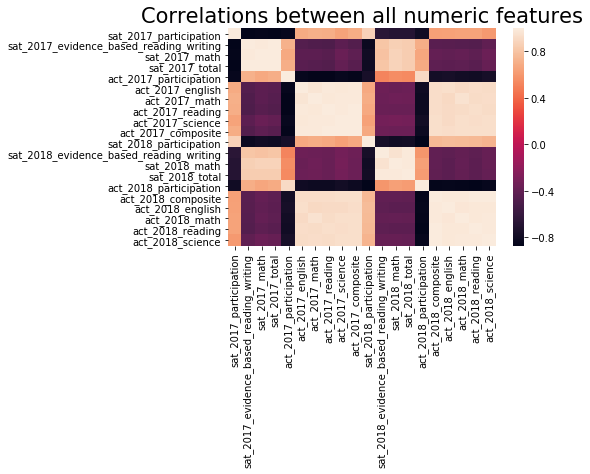

<Figure size 720x720 with 0 Axes>

In [48]:
ax = plt.axes()

fig= plt.figure(figsize=(10,10))
sns.heatmap(act_sat_2017_2018_pd.corr(), ax=ax)

ax.set_title('Correlations between all numeric features', size = 21)


SAT and ACT Participation have negative correlation. 
SAT 2017 and SAT 2018, ACT 2017 and ACT 2018 have a positive correlation.

Define a custom function to subplot histograms
have data for two tests for two years. 
only have composite (and not subtest scores) for the 2018 ACT. 
should write a function that will take the names of 2+ columns 
and subplot histograms. 

While can use pandas plotting or Seaborn here, 
matplotlib gives  greater control over all aspects of the plots.

In [49]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles,list_of_xaxis): #,dataframe='act_sat_2017_2018_pd'):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(10,10)) #  to specify figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives an index value to get into all lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])# Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xaxis[i])# adding x label

Plot and interpret histograms
For each of the following:

Participation rates for SAT & ACT
Math scores for SAT & ACT
Reading/verbal scores for SAT & ACT

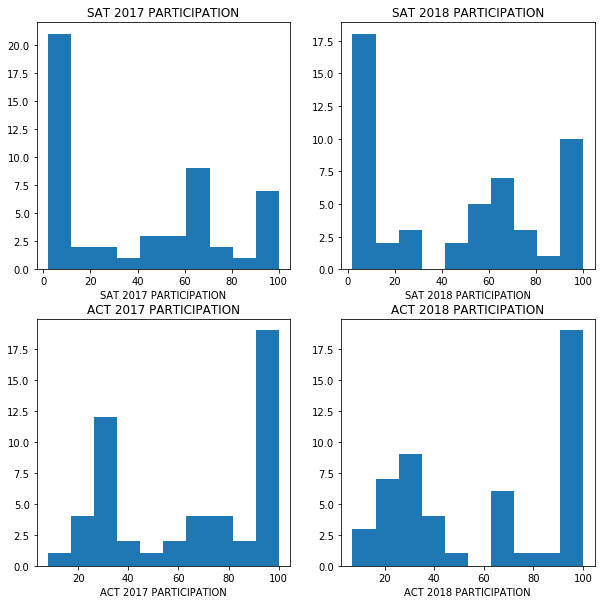

In [50]:
# Code
subplot_histograms( act_sat_2017_2018_pd,['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation'],['SAT 2017 PARTICIPATION','SAT 2018 PARTICIPATION','ACT 2017 PARTICIPATION','ACT 2018 PARTICIPATION'],['SAT 2017 PARTICIPATION','SAT 2018 PARTICIPATION','ACT 2017 PARTICIPATION','ACT 2018 PARTICIPATION'])


ACT has more states with 100% participation while SAT have more states with lesser participation.

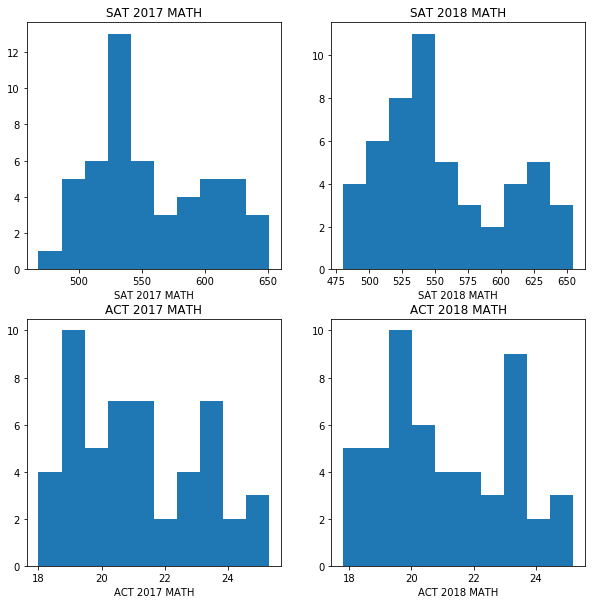

In [51]:
#Math scores for SAT & ACT
subplot_histograms( act_sat_2017_2018_pd,['sat_2017_math','sat_2018_math','act_2017_math','act_2018_math'],['SAT 2017 MATH','SAT 2018 MATH','ACT 2017 MATH','ACT 2018 MATH'],['SAT 2017 MATH','SAT 2018 MATH','ACT 2017 MATH','ACT 2018 MATH'])

MATH marks was higher for SAT in 2017 compared to 2018.

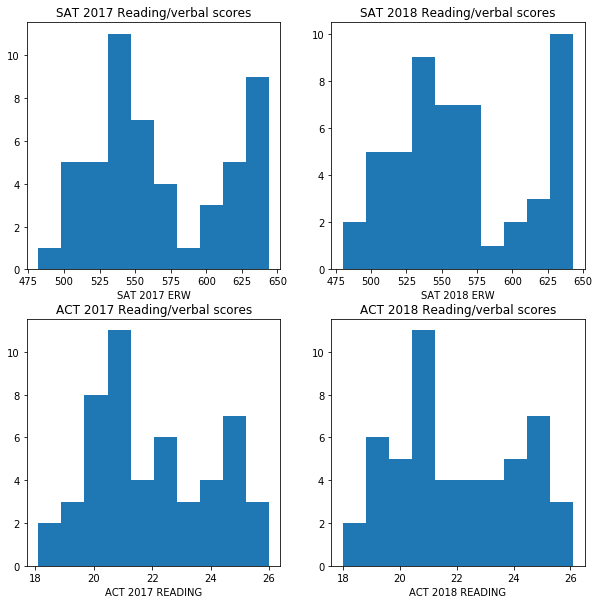

In [52]:
# Reading/verbal scores for SAT & ACT
subplot_histograms( act_sat_2017_2018_pd,['sat_2017_evidence_based_reading_writing','sat_2018_evidence_based_reading_writing','act_2017_reading','act_2018_reading'],['SAT 2017 Reading/verbal scores','SAT 2018 Reading/verbal scores','ACT 2017 Reading/verbal scores','ACT 2018 Reading/verbal scores'],['SAT 2017 ERW','SAT 2018 ERW','ACT 2017 READING','ACT 2018 READING'])

Students score higher marks by states in SAT reading compared to ACT reading examination.

<Figure size 360x360 with 0 Axes>

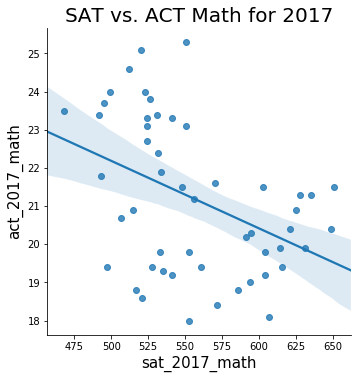

In [53]:
# Code
#SAT vs. ACT math scores for 2017
# Establish the size of the figure.
plt.figure(figsize=(5,5))

# Create scatter plot of SAT vs. ACT math scores for 2017.
sns.lmplot('sat_2017_math','act_2017_math',act_sat_2017_2018_pd)

plt.title("SAT vs. ACT Math for 2017",fontsize = 20)
plt.ylabel("act_2017_math",fontsize = 15)
plt.xlabel("sat_2017_math",fontsize = 15);

Maths mark have negative linear relationship between ACT 2017 and SAT 2017 math scores. 

SAT math marks are generally higher than ACT math marks.

SAT math scores for 2017 is comparitively higher than ACT math scores in 2017.

<Figure size 360x360 with 0 Axes>

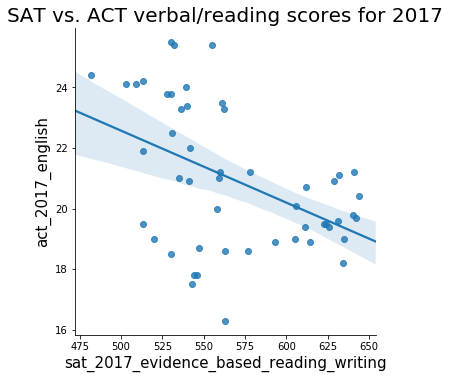

In [54]:
#SAT vs. ACT verbal/reading scores for 2017
# Establish the size of the figure.
plt.figure(figsize=(5,5))

# Create scatter plot of SAT vs. ACT math scores for 2017.
sns.lmplot('sat_2017_evidence_based_reading_writing','act_2017_english',act_sat_2017_2018_pd)

plt.title("SAT vs. ACT verbal/reading scores for 2017",fontsize = 20)
plt.ylabel("act_2017_english",fontsize = 15)
plt.xlabel("sat_2017_evidence_based_reading_writing",fontsize = 15);

The reading and writing marks have negative linear relationship between ACT 2017 and SAT 2017 scores. 
SAT reading and writing are generally higher than ACT english marks.

<Figure size 360x360 with 0 Axes>

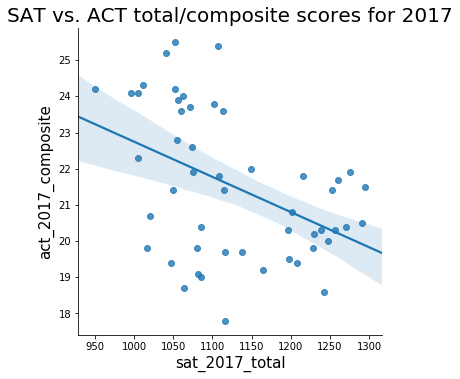

In [55]:
#SAT vs. ACT total/composite scores for 2017
# Establish the size of the figure.
plt.figure(figsize=(5, 5))

# Create scatter plot of SAT vs. ACT math scores for 2017.
sns.lmplot('sat_2017_total','act_2017_composite',act_sat_2017_2018_pd);

plt.title("SAT vs. ACT total/composite scores for 2017",fontsize = 20)
plt.ylabel("act_2017_composite",fontsize = 15)
plt.xlabel("sat_2017_total",fontsize = 15);

<Figure size 360x360 with 0 Axes>

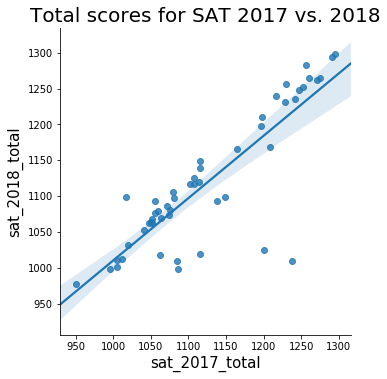

In [56]:
#Total scores for SAT 2017 vs. 2018
# Establish the size of the figure.
plt.figure(figsize=(5, 5))

# Create scatter plot of SAT vs. ACT math scores for 2017.
sns.lmplot('sat_2017_total','sat_2018_total',act_sat_2017_2018_pd);

plt.title("Total scores for SAT 2017 vs. 2018",fontsize = 20)
plt.ylabel("sat_2018_total",fontsize = 15)
plt.xlabel("sat_2017_total",fontsize = 15);

Total scores for SAT 2017 vs. 2018 have positive linear relationship with few outliers

<Figure size 360x360 with 0 Axes>

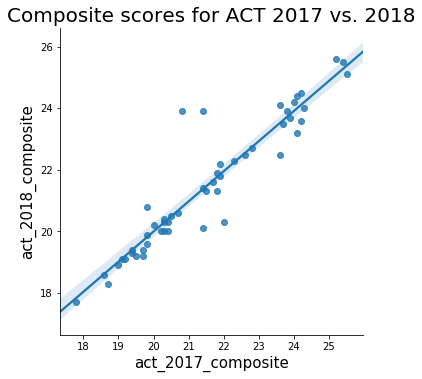

In [57]:
#Composite scores for ACT 2017 vs. 2018
# Establish the size of the figure.
plt.figure(figsize=(5, 5))

# Create scatter plot of SAT vs. ACT math scores for 2017.
sns.lmplot('act_2017_composite','act_2018_composite',act_sat_2017_2018_pd);

plt.title("Composite scores for ACT 2017 vs. 2018",fontsize = 20)
plt.ylabel("act_2018_composite",fontsize = 15)
plt.xlabel("act_2017_composite",fontsize = 15);


composite scores for ACT 2017 vs. 2018 have positive linear relationship with few outliers

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text yticklabel objects>)

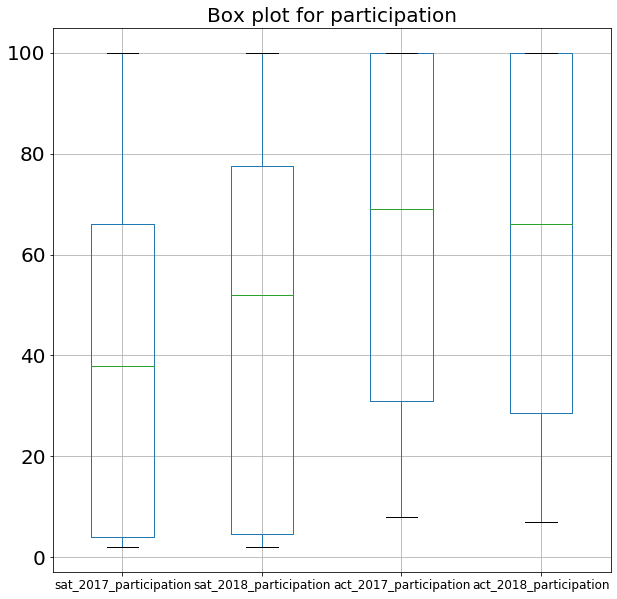

In [58]:
# Code
act_sat_2017_2018_pd.boxplot(column=['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation'],figsize=(10,10))
plt.title("Box plot for participation",fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 20)

ACT have more states with 100% participation compared to SAT. 
SAT 2018 participation is higher than SAT 2017

(array([ 900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350.]), <a list of 10 Text yticklabel objects>)

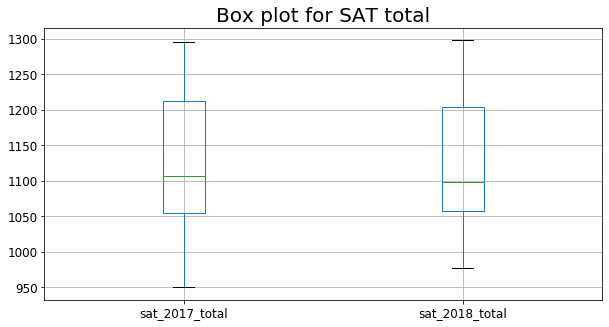

In [59]:
act_sat_2017_2018_pd.boxplot(column=['sat_2017_total','sat_2018_total'],figsize=(10,5))
plt.title("Box plot for SAT total",fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

The trend is similar for SAT 2017 and SAT 2018 total.

(array([17., 18., 19., 20., 21., 22., 23., 24., 25., 26.]),
 <a list of 10 Text yticklabel objects>)

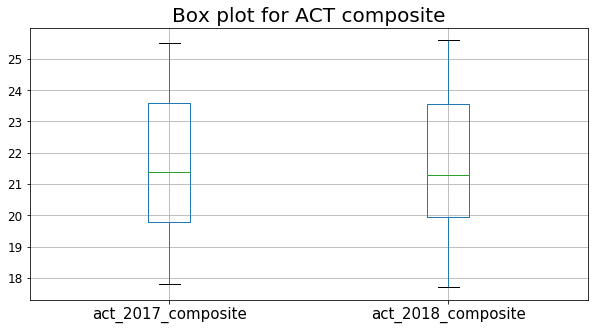

In [60]:
act_sat_2017_2018_pd.boxplot(column=['act_2017_composite','act_2018_composite'],figsize=(10,5))
plt.title("Box plot for ACT composite",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)

The trend is similar for ACT 2017 and SAT 2018 composite.

(array([450., 475., 500., 525., 550., 575., 600., 625., 650., 675.]),
 <a list of 10 Text yticklabel objects>)

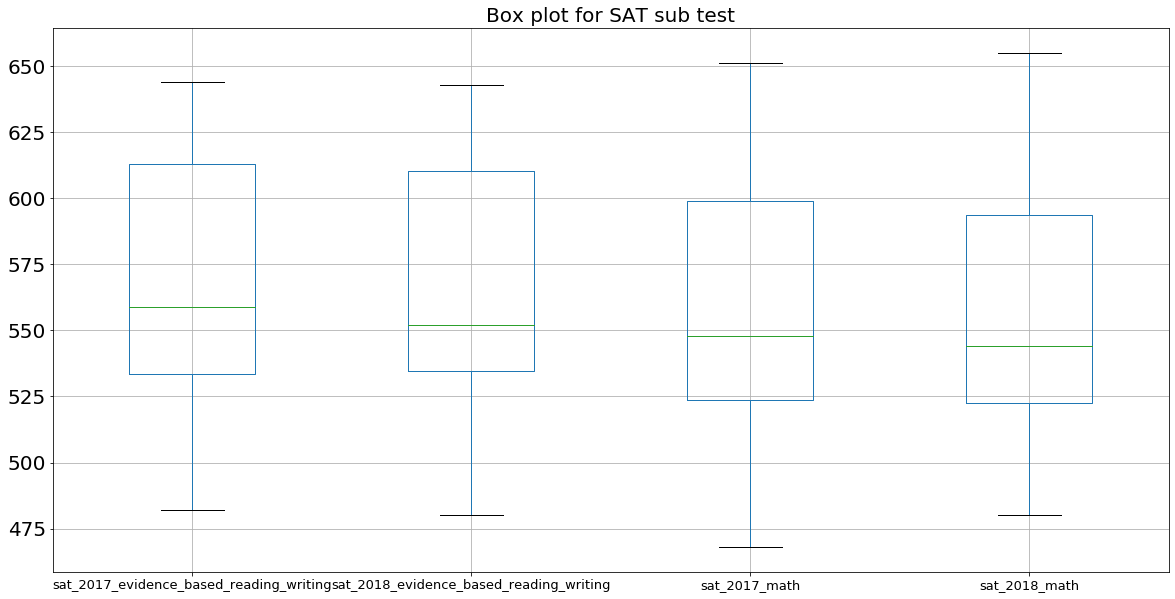

In [61]:
act_sat_2017_2018_pd.boxplot(column=['sat_2017_evidence_based_reading_writing','sat_2018_evidence_based_reading_writing','sat_2017_math','sat_2018_math'],figsize=(20,10))
plt.title("Box plot for SAT sub test",fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 20)

The SAT marks have shown decrease from year to year.

(array([14., 16., 18., 20., 22., 24., 26., 28.]),
 <a list of 8 Text yticklabel objects>)

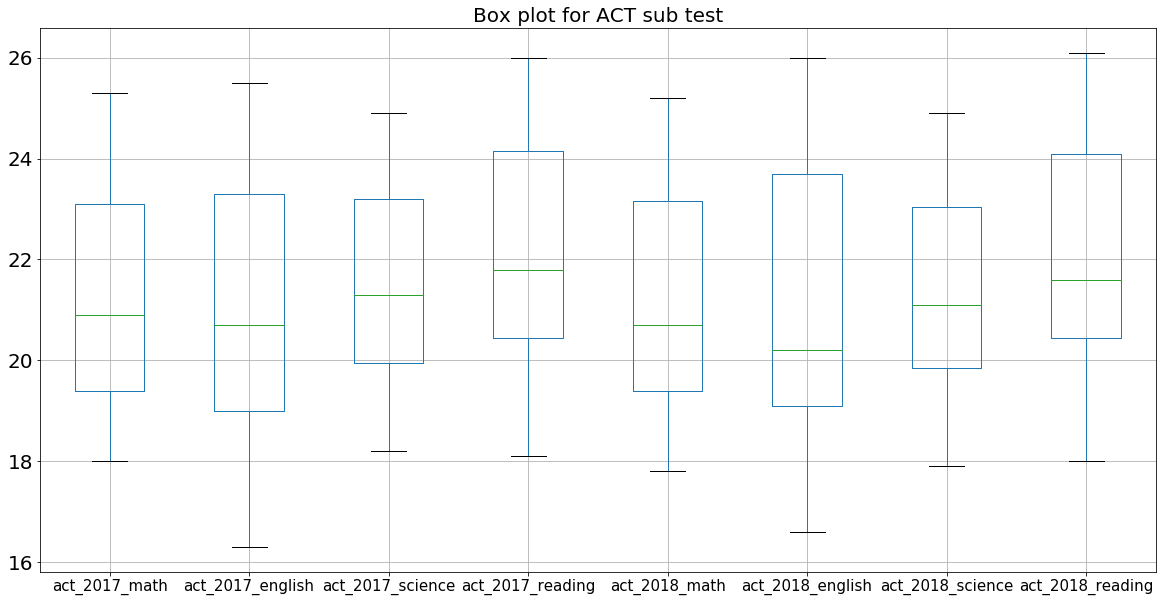

In [62]:
act_sat_2017_2018_pd.boxplot(column=['act_2017_math','act_2017_english','act_2017_science','act_2017_reading','act_2018_math','act_2018_english','act_2018_science','act_2018_reading'],figsize=(20,10))
plt.title("Box plot for ACT sub test",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)

English mark by states have higher standard deviation while maths and science have lower standard deviation.
Reading marks are higher than any other subject marks.

In [63]:
act_sat_2017_2018_participation_pd=act_sat_2017_2018_pd[(act_sat_2017_2018_pd.sat_2017_participation<10.0)|(act_sat_2017_2018_pd.sat_2017_participation>90.0)|(act_sat_2017_2018_pd.act_2017_participation<10.0)|(act_sat_2017_2018_pd.act_2017_participation>90.0)|(act_sat_2017_2018_pd.sat_2018_participation<10.0)|(act_sat_2017_2018_pd.sat_2018_participation>90.0)|(act_sat_2017_2018_pd.act_2018_participation<10.0)|(act_sat_2017_2018_pd.act_2018_participation>90.0)]
act_sat_2017_2018_participation_pd.head()

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
5,Colorado,11.0,606.0,595.0,1201.0,100.0,20.1,20.3,21.2,20.9,20.8,100.0,519.0,506.0,1025.0,30.0,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535.0,519.0,1053.0,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505.0,492.0,998.0,17.0,23.2,23.7,23.1,24.5,23.4


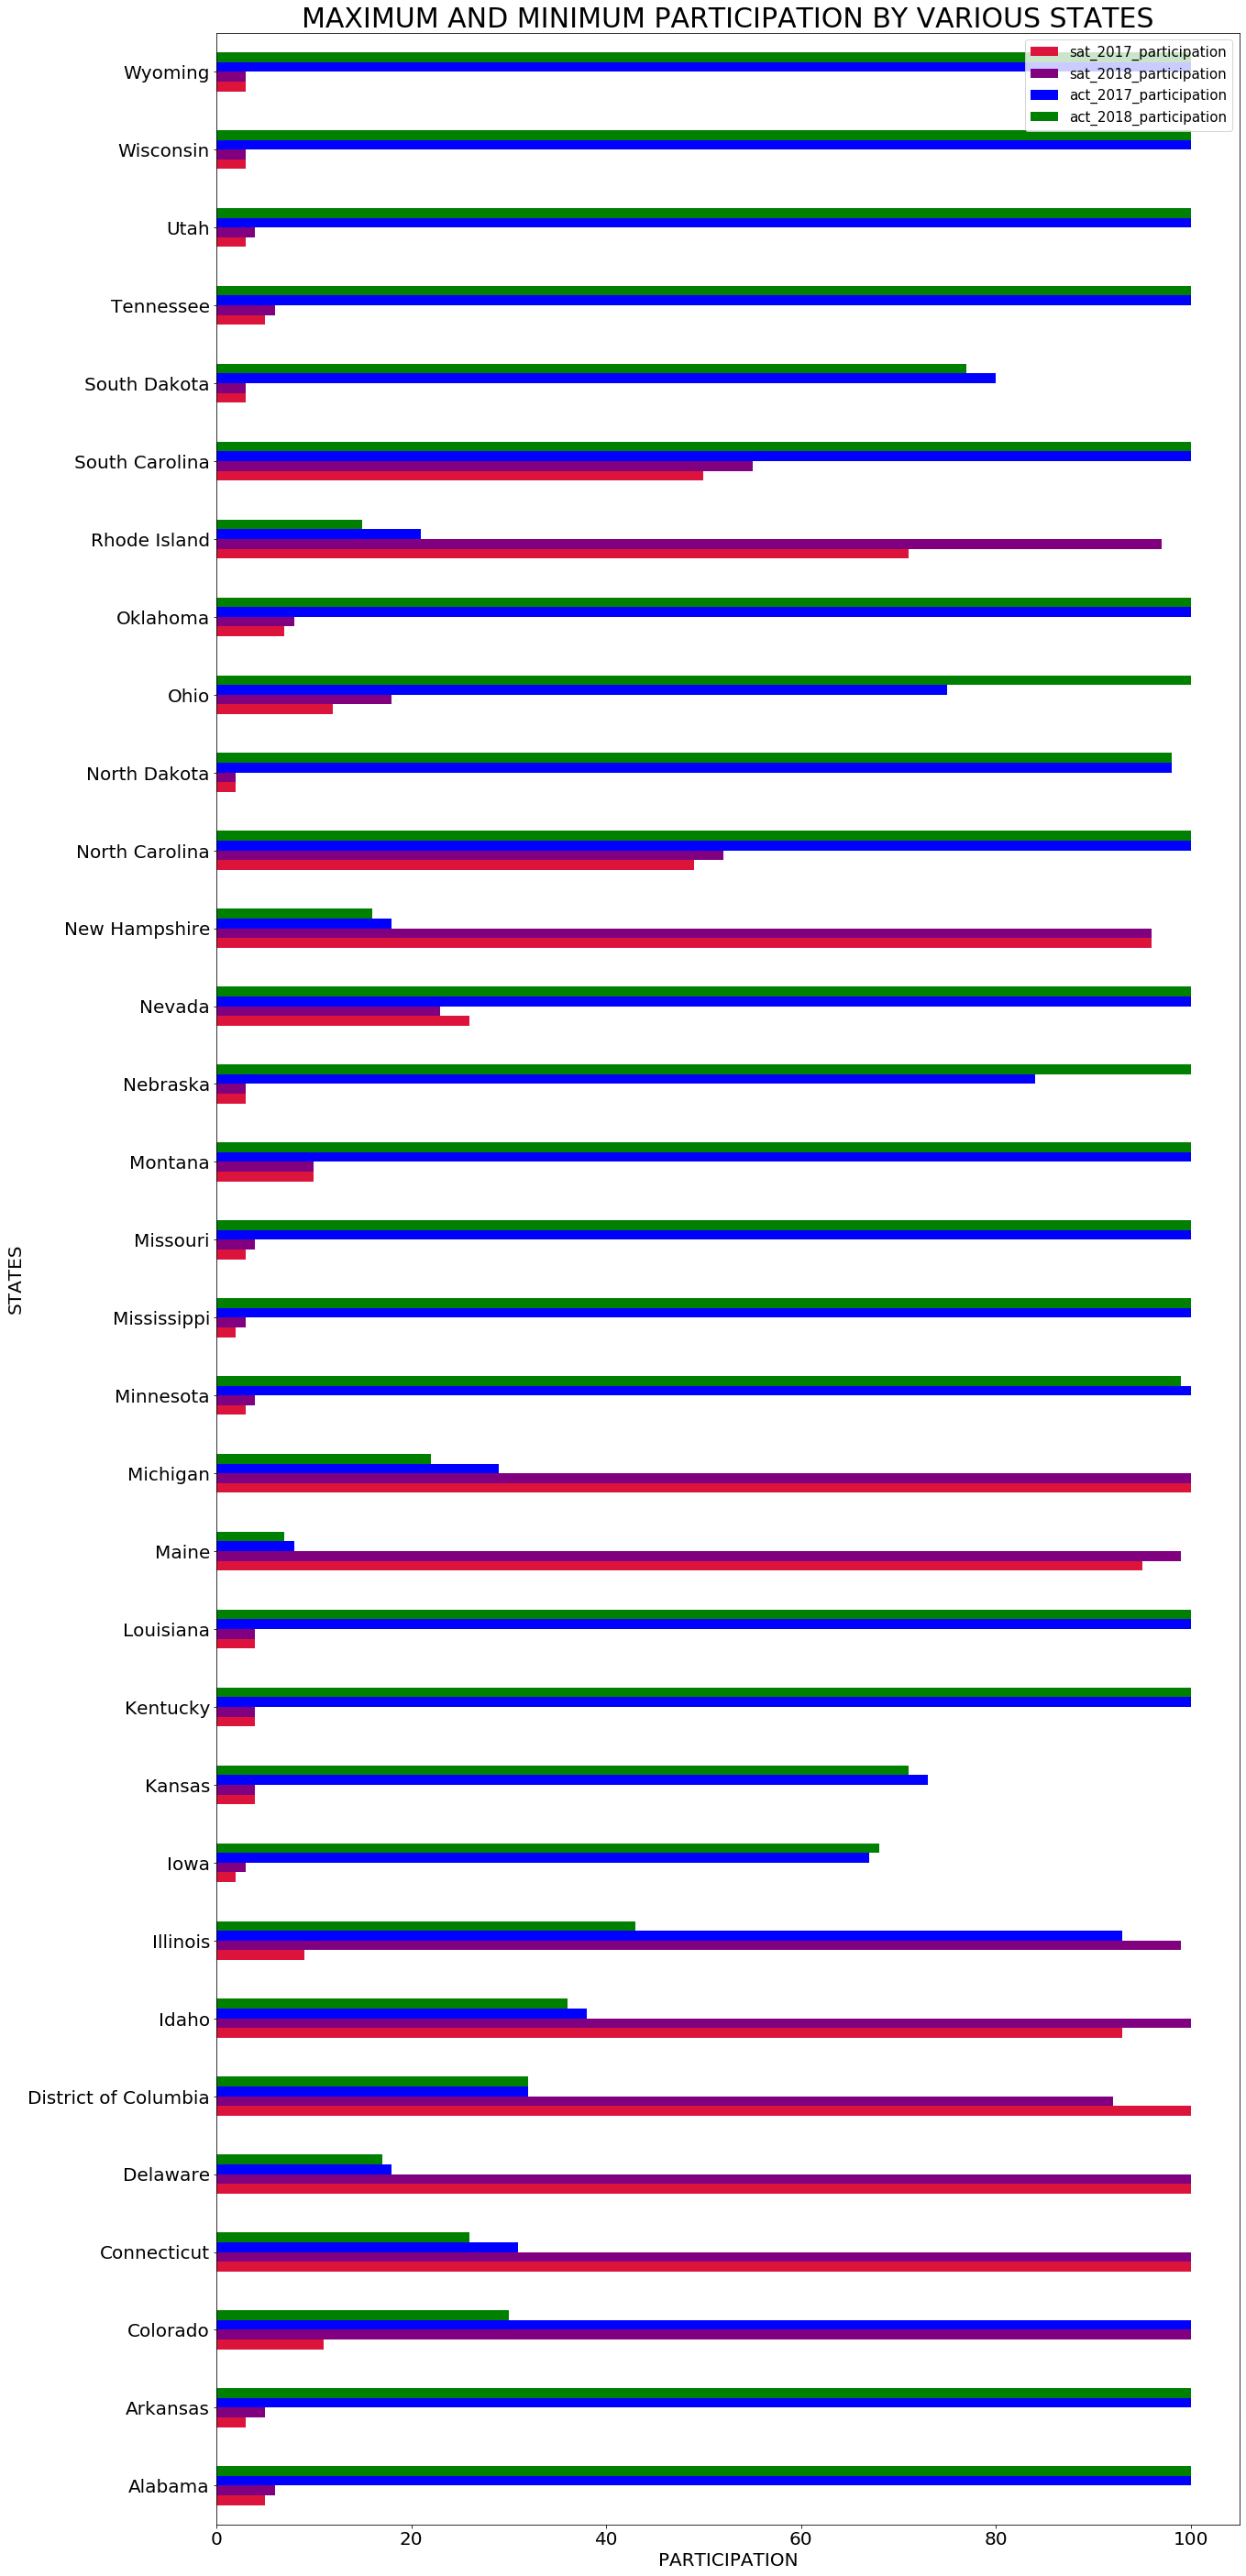

In [64]:
plt.style.use('seaborn-pastel')
df=act_sat_2017_2018_participation_pd[['states_participating','sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']]
df = df.set_index(df['states_participating'])
list_style=['crimson','purple','b','g']
df.plot(kind='barh',figsize=(20,50),width=0.5,color=list_style);


plt.title('MAXIMUM AND MINIMUM PARTICIPATION BY VARIOUS STATES',fontsize = 30)
plt.xlabel('PARTICIPATION',fontsize = 20)
plt.ylabel('STATES',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc = 'upper right', fontsize = 15)

Rhode Island, Illinois and colorodo ACT has shown decrease in participation in 2018 while increase in SAT participation in 2018.
Ohio participation increased in 2018. 
Generally, based on this chart, could say if SAT participation is more in a particular state then ACT participation is lesser in the state. 
If ACT participation is higher then SAT is lower in the state.

In [65]:
act_sat_2017_2018_participation_pd=act_sat_2017_2018_pd[(act_sat_2017_2018_pd.states_participating=='Colorado')
                                |(act_sat_2017_2018_pd.states_participating=='Illinois')
                                |(act_sat_2017_2018_pd.states_participating=='Rhode Island')
                                |(act_sat_2017_2018_pd.states_participating=='South Dakota')]
act_sat_2017_2018_participation_pd.head()

,states_participating,sat_2017_participation,sat_2017_evidence_based_reading_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence_based_reading_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
5,Colorado,11.0,606.0,595.0,1201.0,100.0,20.1,20.3,21.2,20.9,20.8,100.0,519.0,506.0,1025.0,30.0,23.9,23.9,23.2,24.4,23.5
13,Illinois,9.0,559.0,556.0,1115.0,93.0,21.0,21.2,21.6,21.3,21.4,99.0,513.0,506.0,1019.0,43.0,23.9,24.1,23.4,24.2,23.4
39,Rhode Island,71.0,539.0,524.0,1062.0,21.0,24.0,23.3,24.7,23.4,24.0,97.0,513.0,505.0,1018.0,15.0,24.2,24.4,23.6,25.0,23.5
41,South Dakota,3.0,612.0,603.0,1216.0,80.0,20.7,21.5,22.3,22.0,21.8,3.0,622.0,618.0,1240.0,77.0,21.9,20.8,21.6,22.4,22.2


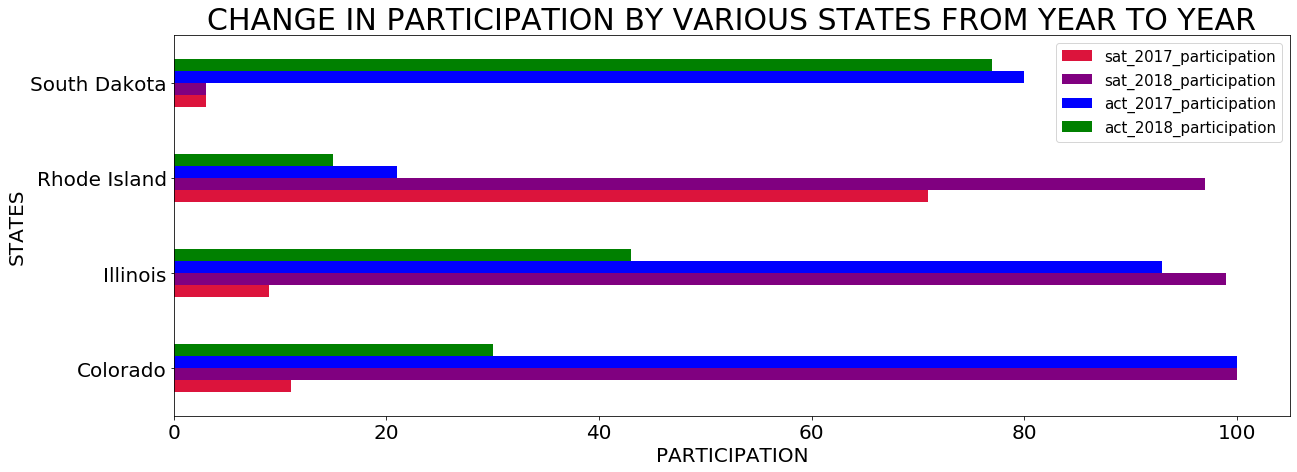

In [66]:
plt.style.use('seaborn-pastel')
df=act_sat_2017_2018_participation_pd[['states_participating','sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']]
df = df.set_index(df['states_participating'])
list_style=['crimson','purple','b','g']
df.plot(kind='barh',figsize=(20,7),width=0.5,color=list_style);


plt.title('CHANGE IN PARTICIPATION BY VARIOUS STATES FROM YEAR TO YEAR',fontsize = 30)
plt.xlabel('PARTICIPATION',fontsize = 20)
plt.ylabel('STATES',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc = 'upper right', fontsize = 15)

Based on the studies, found that the states with maximum participation in one exam participated lesser in the other exam. 
This is because of the state policies. 
Certain states accept SAT and certain states accept ACT. 
While some other states accept both the examination. 
In 2017 there was a change in state policy, 
So in 2018 some of the state moved to SATS examination. 
The marks secured by ACT and SAT have negative linear relationship. 
SAT marks are comparatively higher than ACT marks. 
SAT 2017 and 2018 marks have a linear relationship. 
ACT 2017 and 2018 marks also have a linear relationship.

If in a state with least participation like alaska as shown in the above plot where SAT examination is accepted, 
then the college board might start campaign and speak about the positives of taking the examination 
and offer some discounts in the examination fee. 
SAT can sign contract with the college board.